# Logistic Regression Model
## Importing the model
Our model is a class packaged in the **LogisticRegression.py** file for convenience purposes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from LogisticRegression import LogisticRegression
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

---

# Experiments to help understand the model
In these experiments we will use two-feature binary class datasets and try to find the optimal wieights for our classifier by manipulating the no. of iterations and the learning rate.

## First Experiment: Fitting the Model to a Reduced Iris Dataset
We Will start with a simple experiment. We are using a subset of the iris dataset `iris-reduced.csv`, we are using two classes and two feautres. The two classes are highly separated, this allows us to understabd more about the how the model works.

Provided the learning rate is $\eta$ and the number of iterations is $\tau$

### High # of iterations, low learning rate
- $\tau$ = 150,000
- $\eta$ = 1e-5

@ no of iterations = 150000 and learning rate = 1e-05 
 final W = [[-0.07708747]
 [-0.41811067]
 [ 0.56088464]] 
 final cost = [0.34484796]


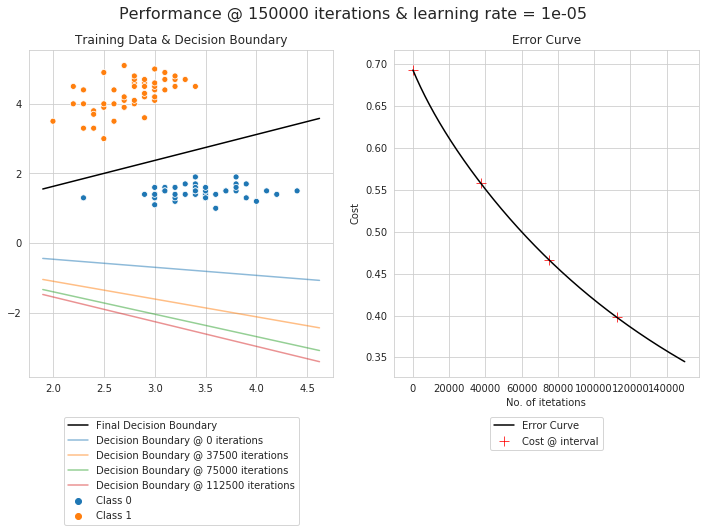

In [2]:
Data=np.loadtxt('iris-reduced.csv')
X=Data[:,1:3]
y=Data[:,4]
classifier = LogisticRegression(X,y)
f = classifier.train(150000, 1e-5)

**We notice that, despite the high number of iterations, the learning gradient is not steep enough. this suggest that our learning rate was too low.**

### Reducing # of iterations and increasing the learning rate
- $\tau$ = 50,000
- $\eta$ = 1e-3

@ no of iterations = 50000 and learning rate = 0.001 
 final W = [[-0.46054026]
 [-2.23480103]
 [ 2.66065312]] 
 final cost = [0.01812753]


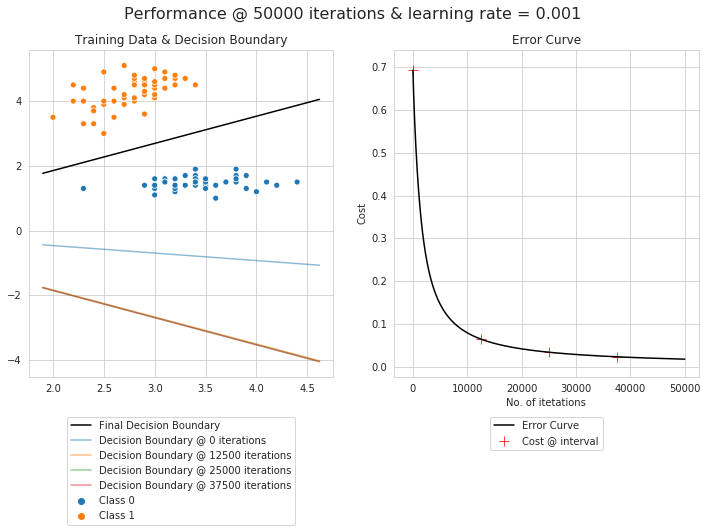

In [3]:
classifier = LogisticRegression(X,y)
f = classifier.train(50000, 1e-3)

**We notice that with this particular dataset, due to how widely separated the classes are, we can use very high learning rates and very low number of iterations.**

### Trying a low # of itertions and a very high learning rate
- $\tau$ = 1000
- $\eta$ = 0.5

@ no of iterations = 1000 and learning rate = 0.5 
 final W = [[-0.77434097]
 [-3.62275983]
 [ 4.33845848]] 
 final cost = [0.00230502]


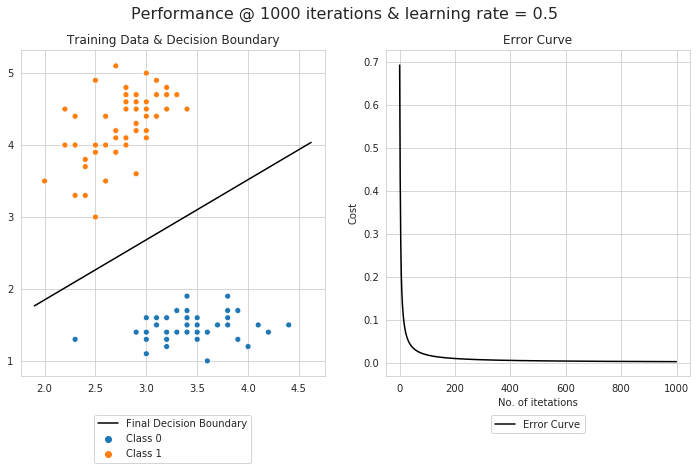

In [4]:
classifier = LogisticRegression(X,y)
f = classifier.train(1000, 0.5, draw_history = False)

---
$\pagebreak$

## Second Experiment: Fitting the to Model animesh-agrwal's Student Exams Dataset
We will use a dataset from [animesh-agrwal's github](https://github.com/animesh-agarwal/Machine-Learning/blob/master/LogisticRegression/data/marks.txt) originally used in a course on logistic regression he made, the file attaches is `animesh-agarwal.csv`. the dataset is not completely linearly separable, meaning our decision boundary will end up misclassifying some points regardless of how much we optimize.

### A too high learning rate
- $\tau$ = 10,000
- $\eta$ = .01

@ no of iterations = 10000 and learning rate = 0.01 
 final W = [[-7.65900397]
 [ 0.41024768]
 [-0.05324509]] 
 final cost = [4.60514431]


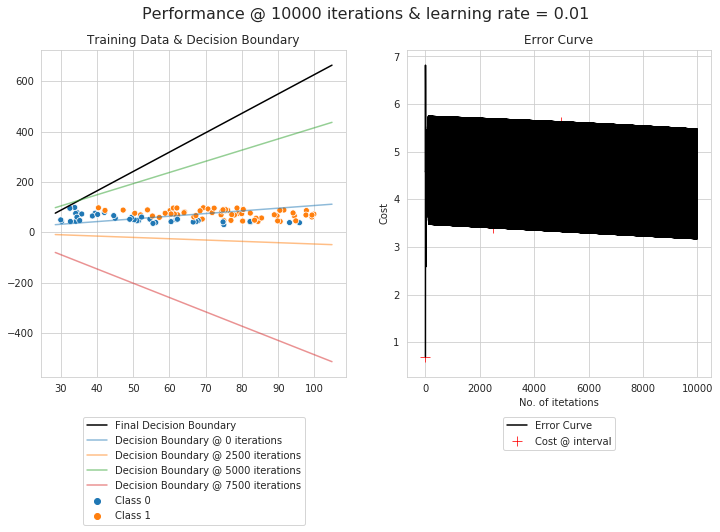

In [5]:
dataxy = np.loadtxt('animesh-agarwal.csv', dtype=float ,delimiter=',')
X = dataxy[:,(0,1)]
y = dataxy[:,2]
classifier = LogisticRegression(X,y)
f = classifier.train(10000, .01)

**The error curve above shows that the learning rate is way too high, we will modify our parameters accordingly.**

### Effects of the Learning Rate and No. of Iterations on accuracy
#### Learning Rate vs. Accuracy
We begin by trying differen learning rates at 100,000 iterations. We will plot the result on a semilog scale to find the optimal learning rate.

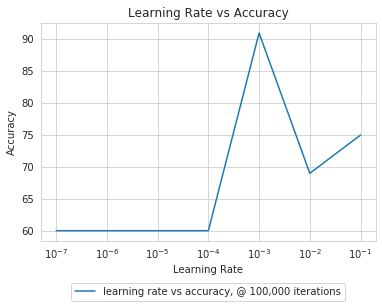

In [6]:
dict = {}
learning_rates = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
for i in learning_rates:
    classifier = LogisticRegression(X,y)
    f = classifier.train(100000, i, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(xscale='log',title='Learning Rate vs Accuracy', xlabel='Learning Rate', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "learning rate vs accuracy, @ 100,000 iterations", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

#### No. of Iterations vs. Accuracy
we will take the best learning rate from above and try it with different numbers of itration, increasing iterations with every experiment.

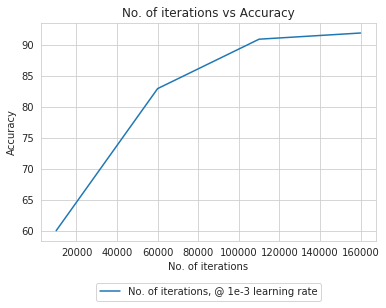

In [7]:
dict = {}
for i in range(10000,200001, 50000):
    classifier = LogisticRegression(X,y)
    f = classifier.train(i, 1e-3, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='No. of iterations vs Accuracy', xlabel='No. of iterations', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "No. of iterations, @ 1e-3 learning rate", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

### Measuring discrimination with near optimal parameters
Based on the above, we will try to look at the decision line at:
- $\tau$ = 100,000 and $\eta$ = .001
- $\tau$ = 250,000 and $\eta$ = .001

@ no of iterations = 100000 and learning rate = 0.001 
 final W = [[-4.81180027]
 [ 0.04528064]
 [ 0.03819149]] 
 final cost = [0.38737536]


Points on the correct side of the decision boundary = 91.0%


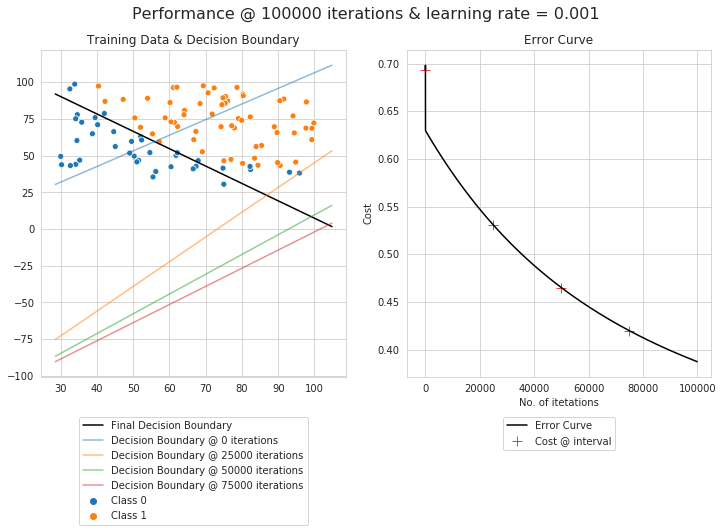

In [8]:
classifier = LogisticRegression(X,y)
f = classifier.train(100000, .001)

y_predict = classifier.predict(X)
Accuracy = 100*np.sum(y == y_predict)/len(y)
print("\n")
print(f"Points on the correct side of the decision boundary = {Accuracy}%")

- $\tau$ = 250,000
- $\eta$ = 0.001

**We think these parameters are close to optimal. The decision boundary classifies 92% of the points correctly, that is fair given that the classes are not linearly separable.**

@ no of iterations = 250000 and learning rate = 0.001 
 final W = [[-8.42279005]
 [ 0.07308283]
 [ 0.06668396]] 
 final cost = [0.29757435]


Points on the correct side of the decision boundary = 92.0%


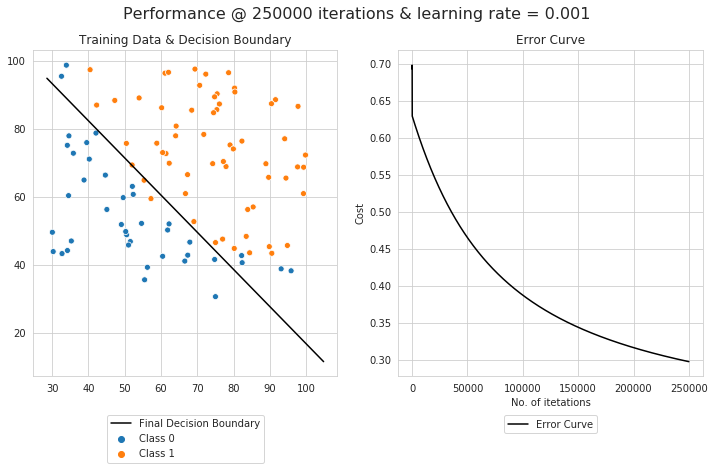

In [9]:
classifier = LogisticRegression(X,y)
f = classifier.train(250000, .001, draw_history = False)

y_predict = classifier.predict(X)
Accuracy = 100*np.sum(y == y_predict)/len(y)
print("\n")
print(f"Points on the correct side of the decision boundary = {Accuracy}%")

---
$\pagebreak$

# Testing the model prediction capabilities
In this section we will use larger and more complex binary class dataset and divide them into training and test data to test our predictions.

One of the restrictions of this model is that the labels have to be (0,1) encoded, for that we will use the `LabelEncoder` function from scikit learn.

We will also use `train_test_split` function from scikit. 

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

We will also define a function to draw a confusion matrix.

In [11]:
import scikitplot as skplt
def confusion(y_test, y_predict):
    fig, ax = plt.subplots()

    skplt.metrics.plot_confusion_matrix(
        y_test, 
        y_predict,
        ax=ax)

    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show() 

---

## First experiment B.D. Ripley's Synthetized Dataset
We will use the [prnn_synth](https://www.openml.org/d/464) dataset, a synthetized data from `Pattern Recognition and Neural Networks' by B.D. Ripley. Cambridge University Press (1996)  ISBN  0-521-46086-7.` the file attached is `prnn_synth.csv`

This dataset contains 250 instances, 2 features and 2 classes. the classes are not completely separable.

### Importing the data

In [12]:
df = pd.read_csv('prnn_synth.csv')
df.dropna(how="all", inplace=True)

class_in_strings = lambda x: 'Class ' + str(x)
df['yc']= df["yc"].apply(class_in_strings)

df.describe()

,xs,ys
count,250.000000,250.000000
mean,-0.072758,0.504362
std,0.489496,0.254823
min,-1.246525,-0.191313
25%,-0.509234,0.323365
50%,-0.041834,0.489827
75%,0.369964,0.704390
max,0.861296,1.093178


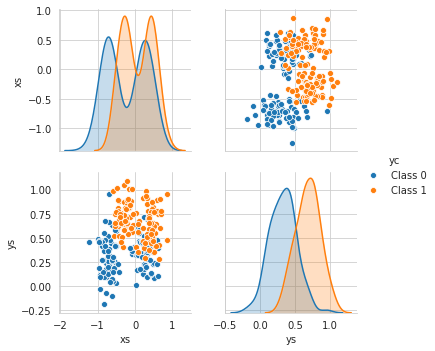

In [13]:
sns.pairplot(data = df, hue = "yc")

In [14]:
X = np.asarray(df[["xs", "ys"]])
y = np.asarray(df["yc"])

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

### Experimenting With Parametes
#### Learning Rate vs Accuracy

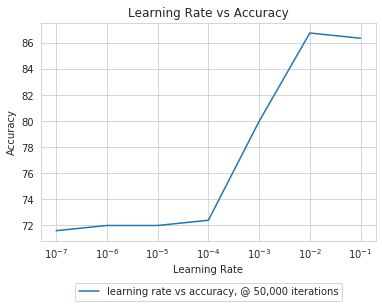

In [15]:
dict = {}
learning_rates = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
for i in learning_rates:
    classifier = LogisticRegression(X,y)
    f = classifier.train(50000, i, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(xscale='log',title='Learning Rate vs Accuracy', xlabel='Learning Rate', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "learning rate vs accuracy, @ 50,000 iterations", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

#### No. of Iterations vs Accuracy

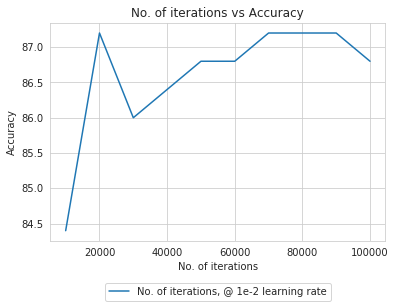

In [16]:
dict = {}
for i in range(10000,100001, 10000):
    classifier = LogisticRegression(X,y)
    f = classifier.train(i, 1e-2, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='No. of iterations vs Accuracy', xlabel='No. of iterations', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "No. of iterations, @ 1e-2 learning rate", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

### Testing the Model on the Best Parameters we Found
We will split our data into training and test data using 80/20 split.

@ no of iterations = 20000 and learning rate = 0.01 
 final W = [[-2.95402125]
 [ 1.29535646]
 [ 6.06386095]] 
 final cost = [0.36986368]


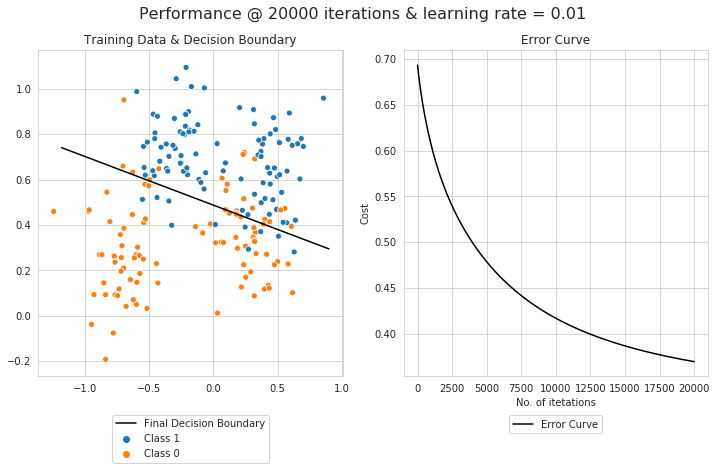

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

classifier = LogisticRegression(X_train,y_train)
f = classifier.train(20000, 0.01, draw_history = False)

### Classifying our test data

In [18]:
y_predict = classifier.predict(X_test)
Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
print(f"Accuracy of predicted labels = {Accuracy}%")

Accuracy of predicted labels = 88.0%


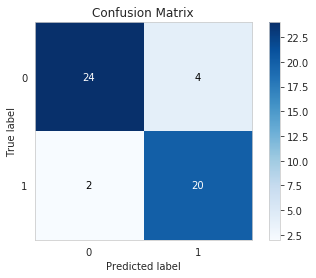

In [19]:
confusion(y_test, y_predict)

### Effect of the Order of the Samples on the Final Accuracy
We will use the parameter `random_state` in scikit's function `train_test_split` to generate randome training and test samples from our data, we will test all of them with the best parameters from above to see if they are going to affect the accuacy

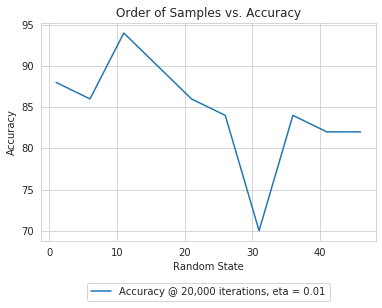

In [20]:
dict = {}
for i in range(1,51, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    classifier = LogisticRegression(X_train,y_train)
    f = classifier.train(20000, 0.01, results = False)
    y_predict = classifier.predict(X_test)
    Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='Order of Samples vs. Accuracy', xlabel='Random State', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "Accuracy @ 20,000 iterations, eta = 0.01", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

---
$\pagebreak$

## Second Experiment: The Full Iris Dataset
We will start again with the [Iris](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) dataset, this time using the full feature set (4 features) but restricting it to two classes. can be found in the `iris.data` file attached: 

### Information about the dataset, quoted from the source
"This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
       example.)  The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  One class is
       linearly separable from the other 2; the latter are NOT linearly
       separable from each other."

**We are going to use two classes and according to the description they will be linearly separable:**
- 0 = 'Setosa'
- 1 = 'Versicolor'

### Importing the data

In [21]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

df = pd.read_csv('iris.data')
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True)

df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


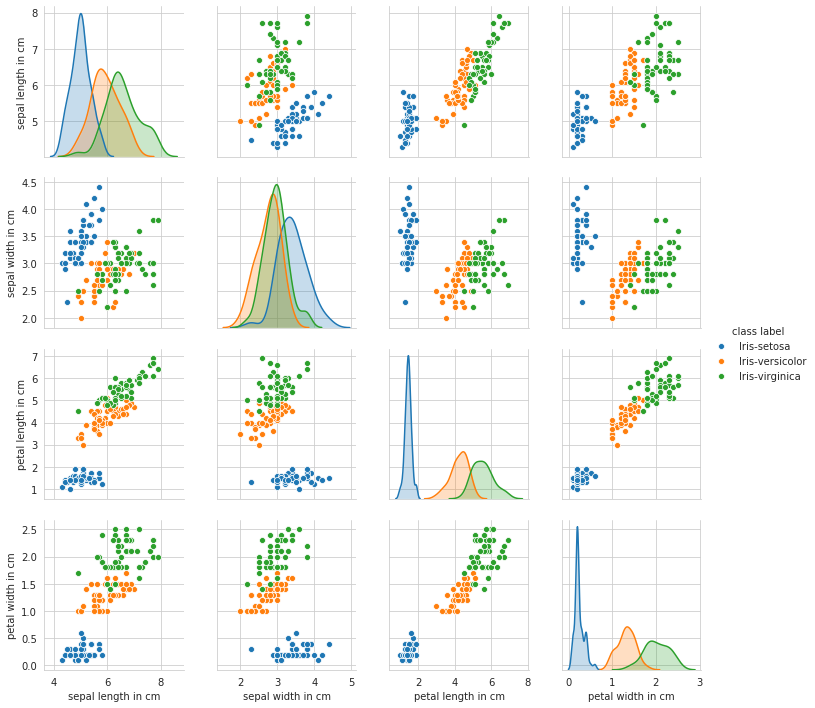

In [22]:
sns.pairplot(data = df, hue = "class label")

### Taking only Iris-setosa and Iris-versicolor instances
These are the two classes with the most separation.

#### Training the model
We will split our data into training and test data using 80/20 split.

@ no of iterations = 1000 and learning rate = 0.01 
 final W = [[-0.20402627]
 [-0.29053776]
 [-1.04934456]
 [ 1.59764918]
 [ 0.68252448]] 
 final cost = [0.06774462]


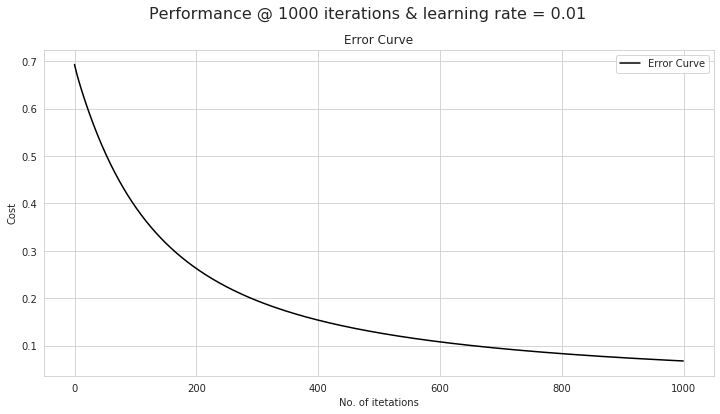

In [23]:
X = df[['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm']]
y = df["class label"]


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

X = np.asarray(X)
y = np.asarray(y)
filter = (y==0)|(y==1)
X = X[filter,:]
y = y[filter]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

classifier = LogisticRegression(X_train,y_train)
f = classifier.train(1000, 0.01, two_d = False)

#### Classifying our test data

In [24]:
y_predict = classifier.predict(X_test)
Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
print(f"Accuracy of predicted labels = {Accuracy}%")

Accuracy of predicted labels = 100.0%


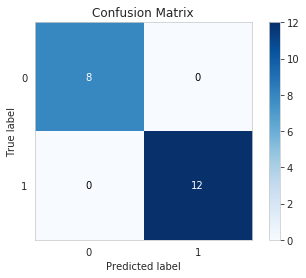

In [25]:
confusion(y_test, y_predict)

### Taking only Iris-versicolor and Iris-verginica instances
These are the two classes with the least separation.

#### Importing the data

In [26]:
X = df[['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm']]
y = df["class label"]


X = np.asarray(X)
y = np.asarray(y)
filter = (y=="Iris-versicolor")|(y=="Iris-virginica")
X = X[filter,:]
y = y[filter]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

#### Experimenting With Parametes
##### Learning Rate vs. Accuracy

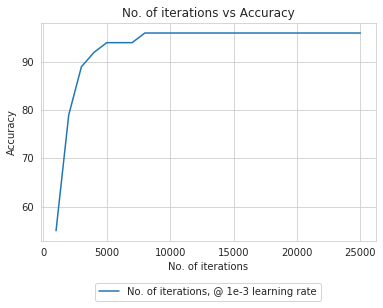

In [27]:
dict = {}
learning_rates = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
for i in learning_rates:
    classifier = LogisticRegression(X,y)
    f = classifier.train(10000, i, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(xscale='log',title='Learning Rate vs Accuracy', xlabel='Learning Rate', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "learning rate vs accuracy, @ 10,000 iterations", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

##### No. of Iterations vs Accuracy

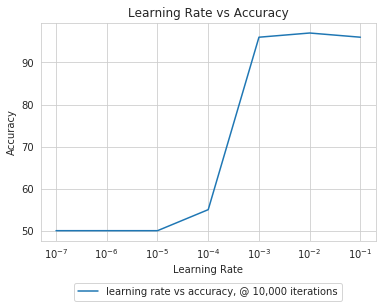

In [28]:
dict = {}
for i in range(1000,25001, 1000):
    classifier = LogisticRegression(X,y)
    f = classifier.train(i, 1e-3, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='No. of iterations vs Accuracy', xlabel='No. of iterations', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "No. of iterations, @ 1e-3 learning rate", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

#### Testing the Model on the Best Parameters we Found

@ no of iterations = 10000 and learning rate = 0.01 
 final W = [[-1.46646965]
 [-2.40292358]
 [-2.16742733]
 [ 3.43459288]
 [ 3.5655377 ]] 
 final cost = [0.16311965]


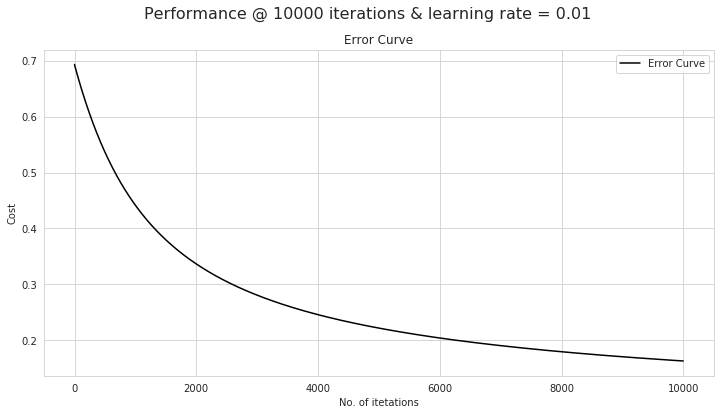

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

classifier = LogisticRegression(X_train,y_train)
f = classifier.train(10000, 1e-2, two_d = False)

#### Classifying our test data

In [30]:
y_predict = classifier.predict(X_test)
Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
print(f"Accuracy of predicted labels = {Accuracy}%")

Accuracy of predicted labels = 95.0%


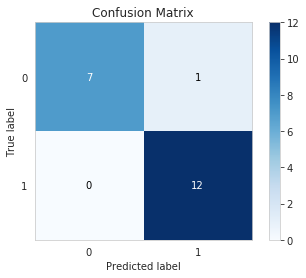

In [31]:
confusion(y_test, y_predict)

#### Effect of the Order of the Samples on the Final Accuracy
We will use the parameter `random_state` in scikit's function `train_test_split` to generate randome training and test samples from our data, we will test all of them with the best parameters from above to see if they are going to affect the accuacy

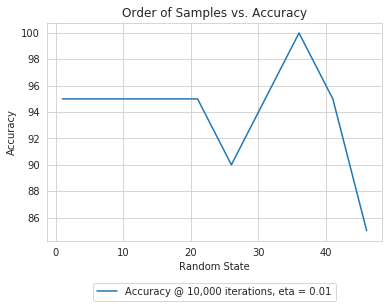

In [32]:
dict = {}
for i in range(1,51, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    classifier = LogisticRegression(X_train,y_train)
    f = classifier.train(10000, 1e-2, results = False)
    y_predict = classifier.predict(X_test)
    Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='Order of Samples vs. Accuracy', xlabel='Random State', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "Accuracy @ 10,000 iterations, eta = 0.01", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

---
$\pagebreak$

## Third Experiment: Banknote Authentication Dataset
We will use the [banknote authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) which has 4 features, two classes and 1372 instances. It can be found in the `data_banknote_authentication.csv` file attached.

### Information about the dataset, quoted from the source
"Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images."

### Importing the data

In [33]:
df = pd.read_csv('data_banknote_authentication.csv')
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('variance of Wavelet Transformed image ',
                    'skewness of Wavelet Transformed image',
                    'curtosis of Wavelet Transformed image',
                    'entropy of image', ))}

df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True)

class_in_strings = lambda x: 'Class ' + str(x)
df['class label']= df["class label"].apply(class_in_strings)

df.describe()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
count,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200
std,2.842494,5.868359,4.310105,2.101683
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.774700,-1.711300,-1.553350,-2.417000
50%,0.495710,2.313400,0.616630,-0.586650
75%,2.814650,6.813100,3.181600,0.394810
max,6.824800,12.951600,17.927400,2.449500


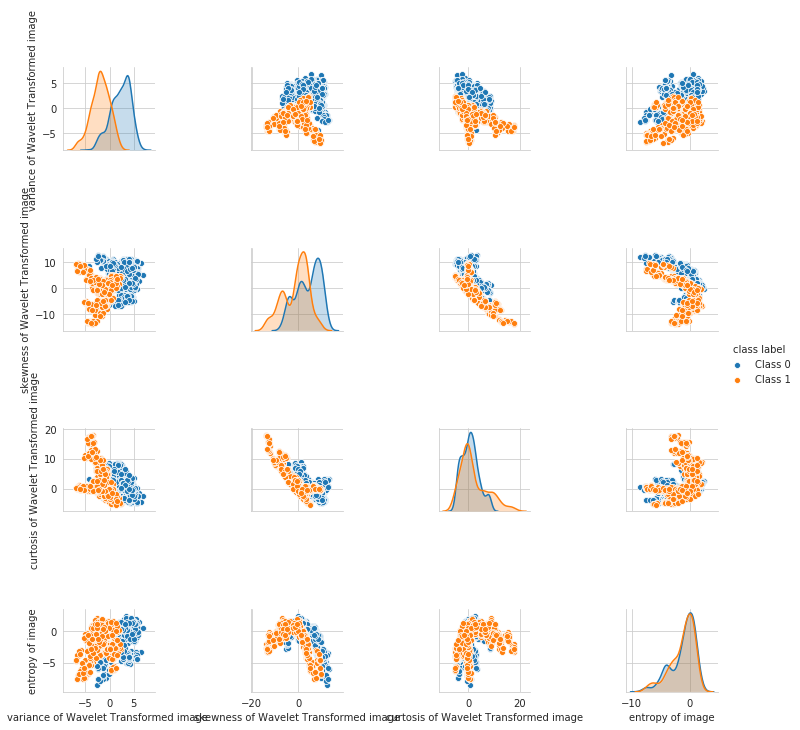

In [34]:
sns.pairplot(data = df, hue = "class label")

In [35]:
X = df[['variance of Wavelet Transformed image ',
        'skewness of Wavelet Transformed image',
        'curtosis of Wavelet Transformed image',
        'entropy of image']]
y = df["class label"]

X = np.asarray(X)
y = np.asarray(y)

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

#### Experimenting With Parametes
##### Learning Rate vs. Accuracy

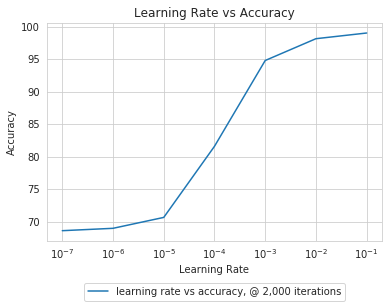

In [36]:
dict = {}
learning_rates = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
for i in learning_rates:
    classifier = LogisticRegression(X,y)
    f = classifier.train(2000, i, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(xscale='log',title='Learning Rate vs Accuracy', xlabel='Learning Rate', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "learning rate vs accuracy, @ 2,000 iterations", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

##### No. of Iterations vs Accuracy

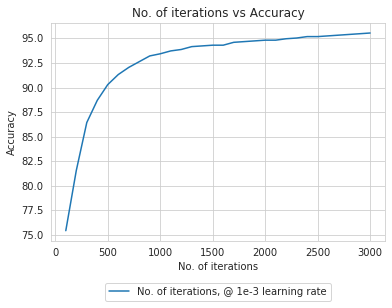

In [37]:
dict = {}
for i in range(100,3001, 100):
    classifier = LogisticRegression(X,y)
    f = classifier.train(i, 1e-3, results = False)
    y_predict = classifier.predict(X)
    Accuracy = 100*np.sum(y == y_predict)/len(y)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='No. of iterations vs Accuracy', xlabel='No. of iterations', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "No. of iterations, @ 1e-3 learning rate", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)

### Training the model
We will split our data into training and test data using 80/20 split.

@ no of iterations = 3000 and learning rate = 0.1 
 final W = [[ 3.0352988 ]
 [-2.82396881]
 [-1.63429646]
 [-1.95560593]
 [-0.18816712]] 
 final cost = [0.02675094]


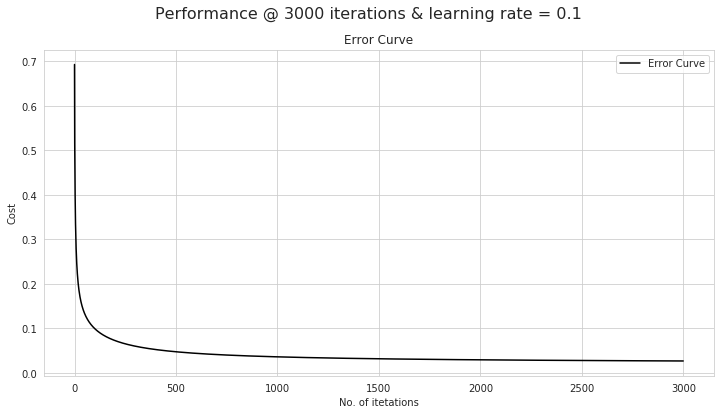

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

classifier = LogisticRegression(X_train,y_train)
f = classifier.train(3000, 0.1, two_d = False)

### Classifying our test data

In [39]:
y_predict = classifier.predict(X_test)
Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
print(f"Accuracy of predicted labels = {Accuracy}%")

Accuracy of predicted labels = 99.27272727272727%


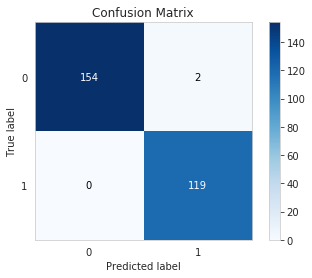

In [40]:
confusion(y_test, y_predict)

### Effect of the Order of the Samples on the Final Accuracy
We will use the parameter `random_state` in scikit's function `train_test_split` to generate randome training and test samples from our data, we will test all of them with the best parameters from above to see if they are going to affect the accuacy

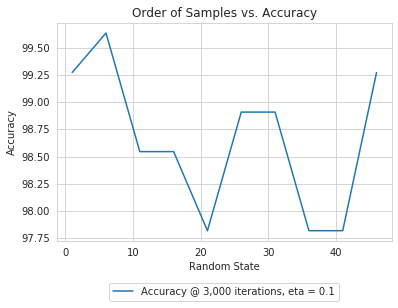

In [41]:
dict = {}
for i in range(1,51, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    classifier = LogisticRegression(X_train,y_train)
    f = classifier.train(3000, 0.1, results = False)
    y_predict = classifier.predict(X_test)
    Accuracy = 100*np.sum(y_test == y_predict)/len(y_test)
    dict[i] = Accuracy
f, ax = plt.subplots()
ax.set(title='Order of Samples vs. Accuracy', xlabel='Random State', ylabel='Accuracy')
sns.lineplot(list(dict.keys()),list(dict.values()), label = "Accuracy @ 3,000 iterations, eta = 0.1", ax = ax)
ax.legend(loc='lower center', bbox_to_anchor=(.5, -.3), ncol=1)